In [2]:
import numpy as np
import matplotlib.pyplot as plt

import plot_func as pf

# Load and Plot PRX Map

In [3]:
zfield = np.load("zfield.npy")
N4 = zfield.shape[0]

Text(0.5, 1.0, 'Orientation Map')

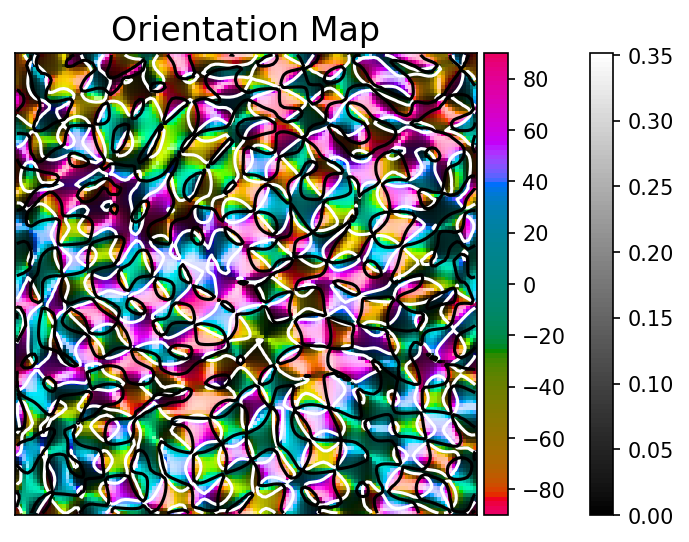

In [11]:
fig,axs = plt.subplots(1,1,figsize=(6,4),dpi=150)

pf.domcolbar(fig,axs,zfield,origin='lower',alim=[-90,90],rlim=[0,None])
rcont = axs.contour(np.real(zfield),levels=[0],colors="w")
icont = axs.contour(np.imag(zfield),levels=[0],colors="k")

axs.set_title('Orientation Map',fontsize=16)

Text(0.5, 1.0, 'Orientation Selectivity')

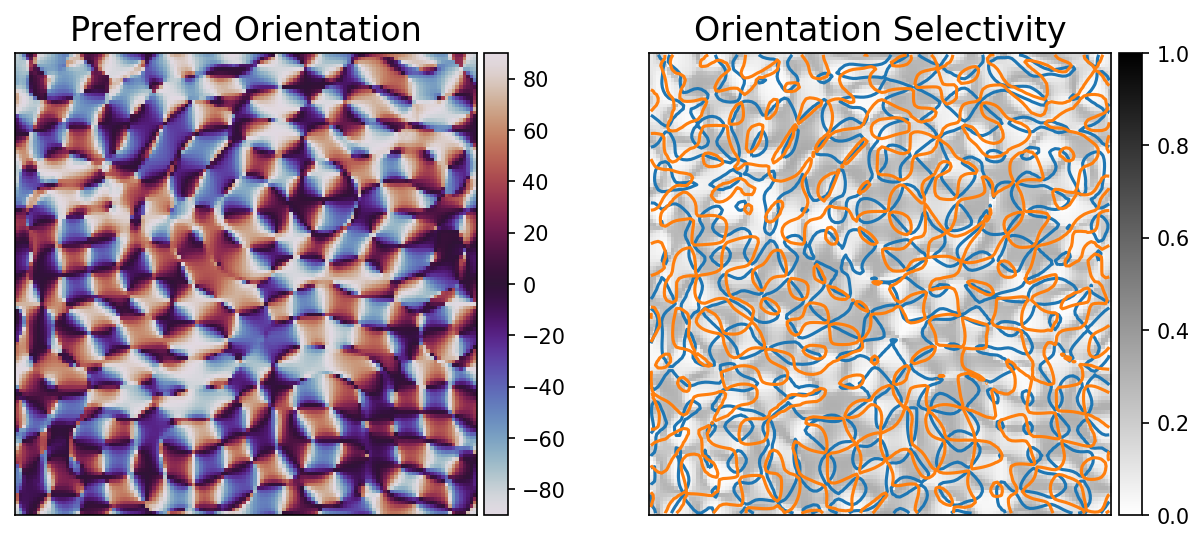

In [9]:
fig,axs = plt.subplots(1,2,figsize=(10,4),dpi=150)

pf.imshowbar(fig,axs[0],np.angle(zfield)*180/(2*np.pi),origin='lower',cmap='twilight',vmin=-90,vmax=90)

pf.imshowbar(fig,axs[1],np.abs(zfield),origin='lower',cmap='binary',vmin=0,vmax=1)
rcont = axs[1].contour(np.real(zfield),levels=[0],colors="C0")
icont = axs[1].contour(np.imag(zfield),levels=[0],colors="C1")
# pws = np.where(np.abs(z)<0.1)
# axs[1].scatter(pws[1],pws[0],c='r')

axs[0].set_title('Preferred Orientation',fontsize=16)
axs[1].set_title('Orientation Selectivity',fontsize=16)

# Calculate Hypercolumn Size

In [21]:
ori = np.angle(zfield)*180/(2*np.pi)
sel = np.abs(zfield)
z_unit = zfield / sel
ori_fft = np.abs(np.fft.fftshift(np.fft.fft2(ori - np.nanmean(ori))))
z_unit_fft = np.abs(np.fft.fftshift(np.fft.fft2(z_unit - np.nanmean(z_unit))))
# ori_fps = np.zeros(int(np.ceil(N4//2*np.sqrt(2))))
# z_unit_fps = np.zeros(int(np.ceil(N4//2*np.sqrt(2))))
ori_fps = np.zeros(N4//2)
z_unit_fps = np.zeros(N4//2)

grid = np.arange(-N4//2,N4//2)
x,y = np.meshgrid(grid,grid)
bin_idxs = np.digitize(np.sqrt(x**2+y**2),np.arange(0,np.ceil(N4//2*np.sqrt(2)))+0.5)
for idx in range(N4//2):
    ori_fps[idx] = np.mean(ori_fft[bin_idxs == idx])
    z_unit_fps[idx] = np.mean(z_unit_fft[bin_idxs == idx])

Text(0.5, 1.0, 'FFT of Normalized Z Field')

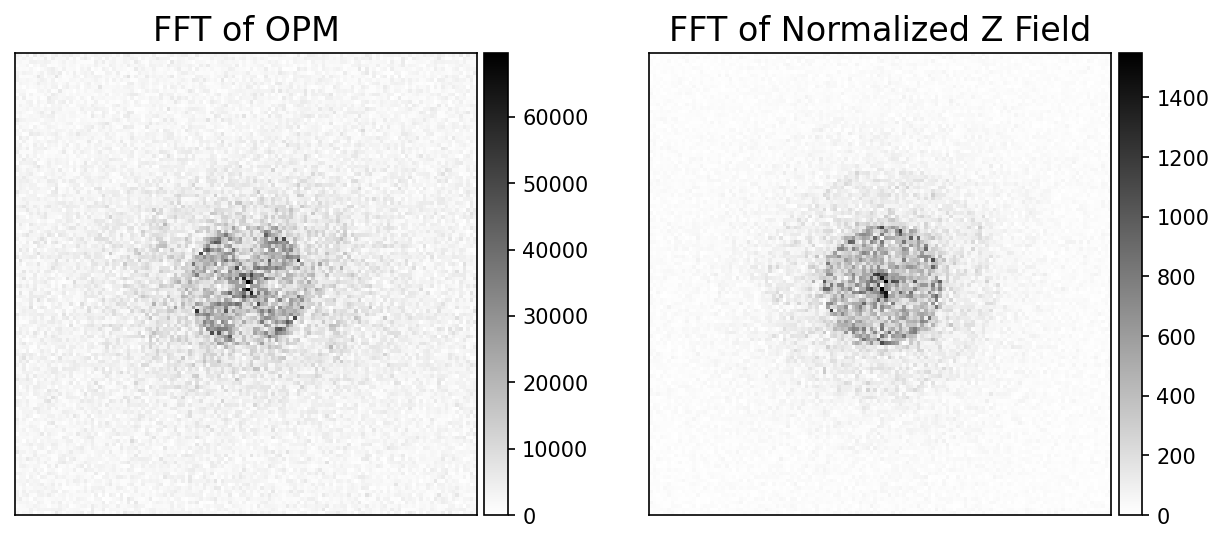

In [22]:
fig,axs = plt.subplots(1,2,figsize=(10,4),dpi=150)

pf.imshowbar(fig,axs[0],ori_fft,cmap='binary')
pf.imshowbar(fig,axs[1],z_unit_fft,cmap='binary')

axs[0].set_title('FFT of OPM',fontsize=16)
axs[1].set_title('FFT of Normalized Z Field',fontsize=16)

(0.0, 10.656404760929336)

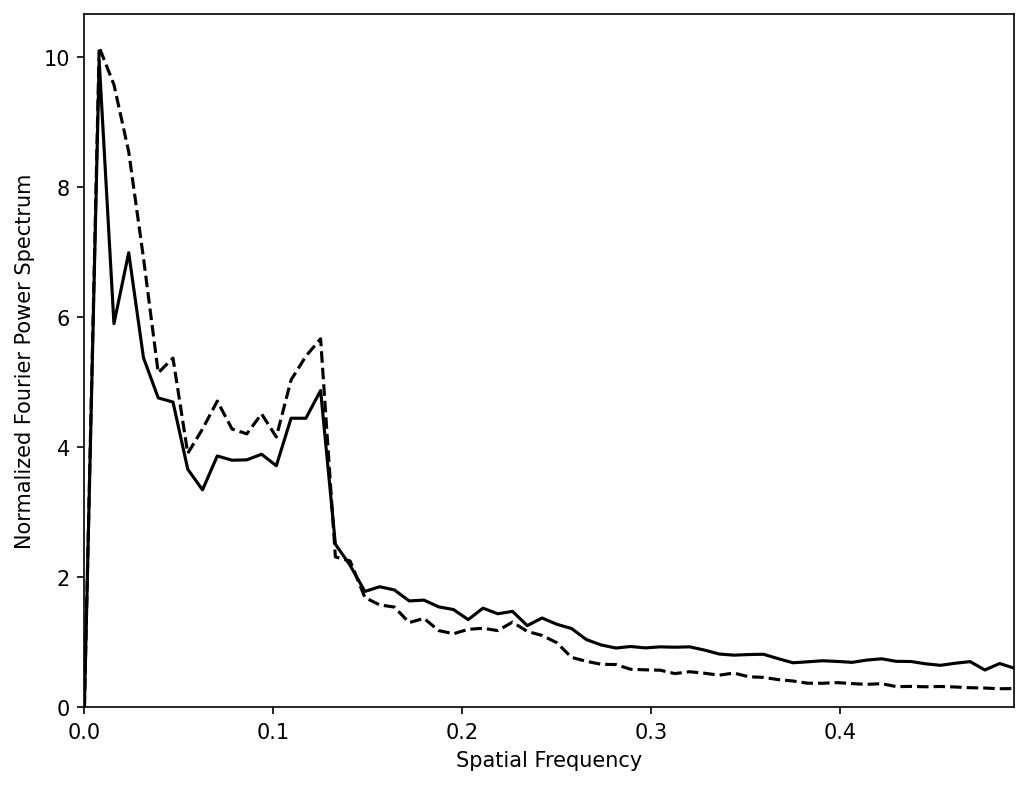

In [23]:
fig,axs = plt.subplots(1,1,figsize=(8,6),dpi=150)

# freqs = np.arange(int(np.ceil(N4//2*np.sqrt(2))))/N4
freqs = np.arange(N4//2)/N4

axs.plot(freqs,ori_fps/np.sum(ori_fps)*N4,'k')
axs.plot(freqs,z_unit_fps/np.sum(z_unit_fps)*N4,'k--')

axs.set_xlabel('Spatial Frequency')
axs.set_ylabel('Normalized Fourier Power Spectrum')

axs.set_xlim(0,(N4//2-1)/N4)
axs.set_ylim(0,None)

Text(0.5, 1.0, 'FFT of Normalized Z Field')

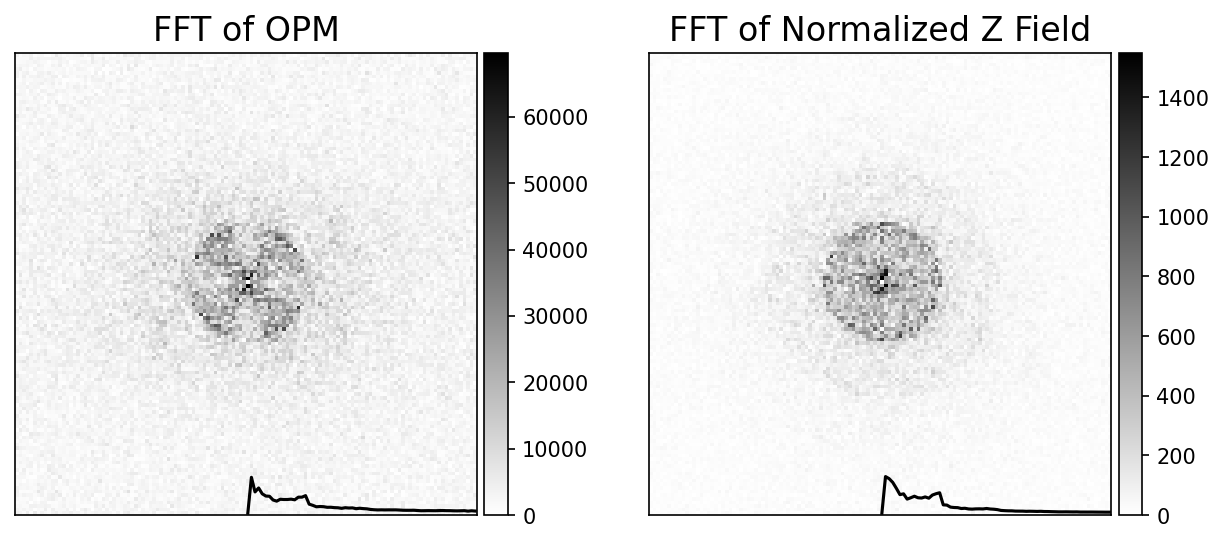

In [24]:
fig,axs = plt.subplots(1,2,figsize=(10,4),dpi=150)

pf.imshowbar(fig,axs[0],ori_fft,cmap='binary',origin='lower')
axs[0].plot(N4//2+np.arange(N4//2),ori_fps/np.sum(ori_fps)*N4,'k')
pf.imshowbar(fig,axs[1],z_unit_fft,cmap='binary',origin='lower')
axs[1].plot(N4//2+np.arange(N4//2),z_unit_fps/np.sum(z_unit_fps)*N4,'k')

axs[0].set_title('FFT of OPM',fontsize=16)
axs[1].set_title('FFT of Normalized Z Field',fontsize=16)

In [27]:
print(ori_fps/np.sum(ori_fps)*N4)

[6.55373823e-15 9.94279550e+00 5.89589306e+00 6.98713203e+00
 5.37297487e+00 4.75436886e+00 4.69052007e+00 3.65801412e+00
 3.34029083e+00 3.86138750e+00 3.79593635e+00 3.80201915e+00
 3.88771024e+00 3.71077287e+00 4.44211414e+00 4.44101496e+00
 4.86738445e+00 2.50614960e+00 2.17837839e+00 1.77796763e+00
 1.85071590e+00 1.80118995e+00 1.63238568e+00 1.64499098e+00
 1.54122588e+00 1.49986526e+00 1.34498703e+00 1.52170574e+00
 1.43475328e+00 1.47193784e+00 1.25247061e+00 1.37019053e+00
 1.27340890e+00 1.20809953e+00 1.03837692e+00 9.55695001e-01
 9.07769345e-01 9.31523243e-01 9.10126435e-01 9.26178874e-01
 9.20534659e-01 9.26120210e-01 8.76871139e-01 8.15768786e-01
 7.98457820e-01 8.07725411e-01 8.12230925e-01 7.44368180e-01
 6.81205051e-01 6.96326564e-01 7.12065788e-01 7.02101801e-01
 6.87728049e-01 7.23060628e-01 7.42578494e-01 7.03357121e-01
 7.00730136e-01 6.64829628e-01 6.42088177e-01 6.74591981e-01
 6.98980661e-01 5.70368769e-01 6.69993088e-01 5.97495412e-01]


In [29]:
maxidx = 16
Lam = 1/freqs[maxidx]
print('Λ =',Lam)
print('Λ/L =',Lam/N4)

Λ = 8.0
Λ/L = 0.0625


# Calculate Pinwheel Locations

In [12]:
def ccw(A,B,C):
    return (C[1]-A[1]) * (B[0]-A[0]) > (B[1]-A[1]) * (C[0]-A[0])

def intersect(A,B,C,D):
    return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)

def cross(A,B):
    return A[0]*B[1] - A[1]*B[0]

def intersectpt(A,B,C,D):
    qmp = [C[0]-A[0],C[1]-A[1]]
    r = [B[0]-A[0],B[1]-A[1]]
    s = [D[0]-C[0],D[1]-C[1]]
    rxs = cross(r,s)
    
    t = cross(qmp,s)/rxs
#     u = cross(qmp,r)/rxs
    
    return [A[0]+t*r[0],A[1]+t*r[1]]

In [13]:
rsegpts = []
for pts in rcont.allsegs[0]:
    for i in range(len(pts)-1):
        rsegpts.append([pts[i],pts[i+1]])
rsegpts = np.array(rsegpts)

isegpts = []
for pts in icont.allsegs[0]:
    for i in range(len(pts)-1):
        isegpts.append([pts[i],pts[i+1]])
isegpts = np.array(isegpts)

In [14]:
pwcnt = 0
pwpts = []

for rsegpt in rsegpts:
    for isegpt in isegpts:
        if intersect(rsegpt[0],rsegpt[1],isegpt[0],isegpt[1]):
            pwcnt += 1
            pwpts.append(intersectpt(rsegpt[0],rsegpt[1],isegpt[0],isegpt[1]))
pwpts = np.array(pwpts)

In [15]:
print('N =',pwcnt)

N = 491


Text(0.5, 1.0, 'Orientation Map')

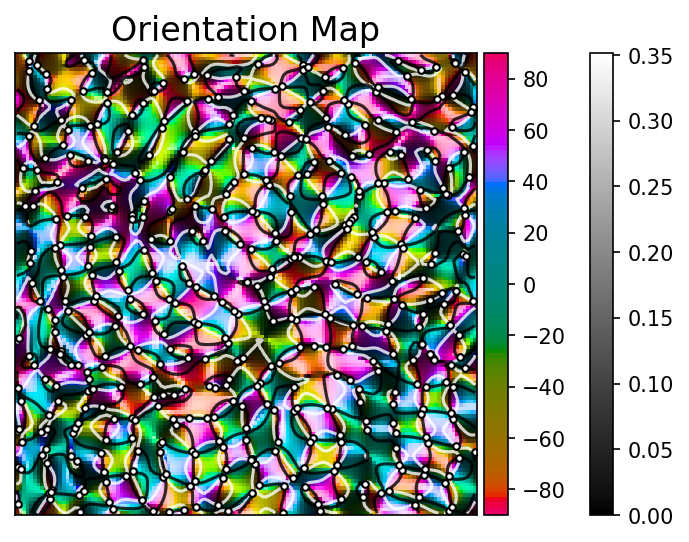

In [16]:
fig,axs = plt.subplots(1,1,figsize=(6,4),dpi=150)

pf.domcolbar(fig,axs,zfield,origin='lower',alim=[-90,90],rlim=[0,None],zorder=0)
rcont = axs.contour(np.real(zfield),levels=[0],colors="w",alpha=0.8,zorder=1)
icont = axs.contour(np.imag(zfield),levels=[0],colors="k",alpha=0.8,zorder=1)
axs.scatter(pwpts[:,0],pwpts[:,1],s=10,c='w',edgecolors='k',zorder=2)

axs.set_title('Orientation Map',fontsize=16)

Text(0.5, 1.0, 'Orientation Selectivity')

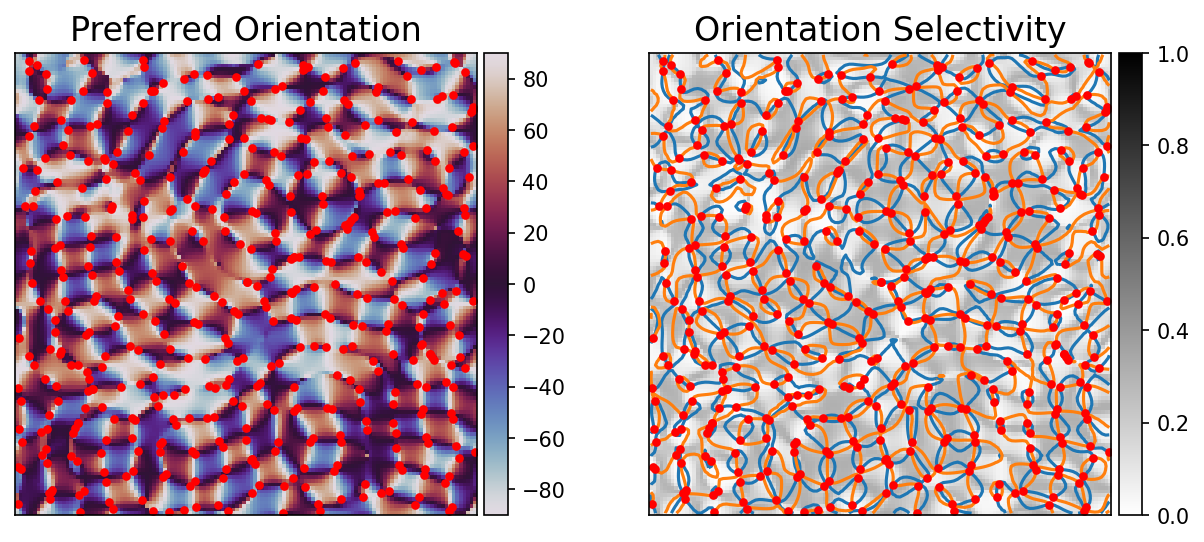

In [17]:
fig,axs = plt.subplots(1,2,figsize=(10,4),dpi=150)

pf.imshowbar(fig,axs[0],np.angle(zfield)*180/(2*np.pi),origin='lower',cmap='twilight',vmin=-90,vmax=90,zorder=0)
axs[0].scatter(pwpts[:,0],pwpts[:,1],s=10,c='r',zorder=2)

pf.imshowbar(fig,axs[1],np.abs(zfield),origin='lower',cmap='binary',vmin=0,vmax=1,zorder=0)
rcont = axs[1].contour(np.real(zfield),levels=[0],colors="C0",zorder=1)
icont = axs[1].contour(np.imag(zfield),levels=[0],colors="C1",zorder=1)
axs[1].scatter(pwpts[:,0],pwpts[:,1],s=10,c='r',zorder=2)

axs[0].set_title('Preferred Orientation',fontsize=16)
axs[1].set_title('Orientation Selectivity',fontsize=16)

In [30]:
print('ρ = N (Λ/L)² =',pwcnt * (Lam/N4)**2)

ρ = N (Λ/L)² = 1.91796875
